In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from scipy import stats

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [7]:
new_df = pd.read_csv("../data/cleaned_music_data.csv")

new_df

,Unnamed: 0,Dating,Violence,World/life,Night/Time,Shake the Audience,Family/Gospel,Romantic,Communication,Obscene,...,Like/Girls,Sadness,Feelings,Danceability,Loudness,Acousticness,Instrumentalness,Valence,Energy,Age
0,0,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,...,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,1.000000
1,1,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,...,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,1.000000
2,2,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,...,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1.000000
3,3,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,...,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,1.000000
4,4,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,...,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,28367,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.391651,...,0.001350,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,0.014286
28368,28368,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,0.318910,...,0.040811,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,0.014286
28369,28369,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,0.356685,...,0.001504,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,0.014286
28370,28370,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,0.492434,...,0.070867,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,0.014286


In [15]:
updated_df = new_df.drop(['Unnamed: 0'], axis=1)
updated_df

,Dating,Violence,World/life,Night/Time,Shake the Audience,Family/Gospel,Romantic,Communication,Obscene,Music,...,Like/Girls,Sadness,Feelings,Danceability,Loudness,Acousticness,Instrumentalness,Valence,Energy,Age
0,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,...,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,1.000000
1,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,...,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,1.000000
2,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,...,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1.000000
3,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,...,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,1.000000
4,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,...,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.391651,0.001350,...,0.001350,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,0.014286
28368,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,0.203889,0.318910,0.058152,...,0.040811,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,0.014286
28369,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,0.001504,0.356685,0.001504,...,0.001504,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,0.014286
28370,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,0.001196,0.492434,0.103614,...,0.070867,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,0.014286


/Users/pcordero/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pcordero/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pcordero/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pcordero/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/p

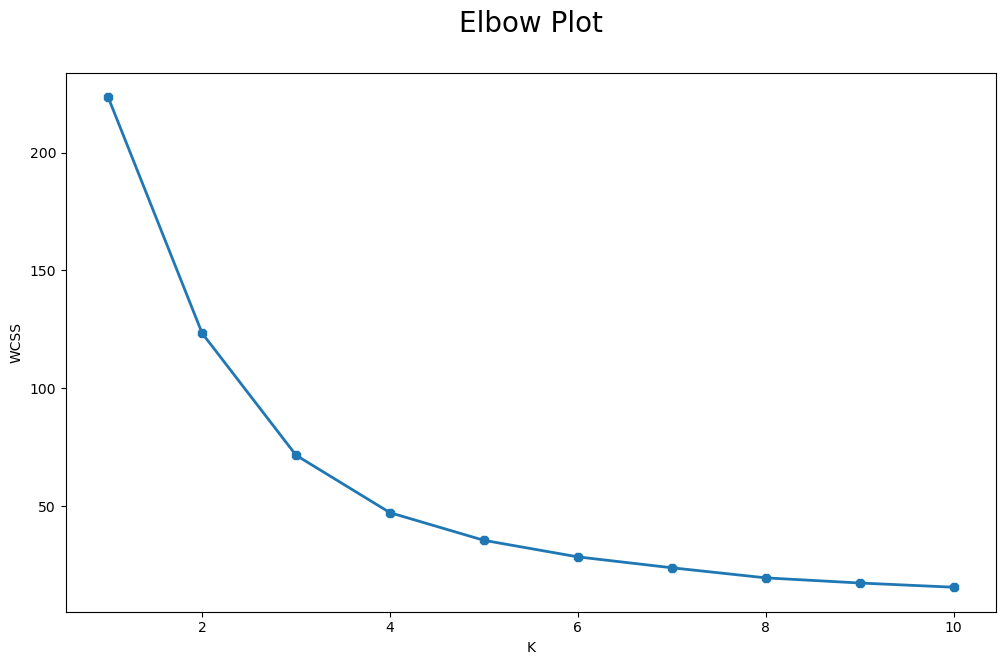

In [35]:
# Elbow plotv with WSS
X1 = updated_df.loc[:, ['Dating', 'Feelings']].values

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters =k, init ="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()


In [36]:
# Creating a KMeans object for the KMeans cluster graph

kmeans = KMeans(n_clusters = 4, init='k-means++')

kmeans_predict = kmeans.fit_predict(X1)



/Users/pcordero/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
# Generating for the dataset
labels = kmeans.fit_predict(X1)
labels

/Users/pcordero/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 3, ..., 0, 0, 0], dtype=int32)

In [38]:
#Printing the centroids of the KMeans clusters

kmeans.cluster_centers_

array([[0.00807002, 0.00741321],
       [0.03010008, 0.37315284],
       [0.17430043, 0.01708107],
       [0.01171177, 0.10042783]])

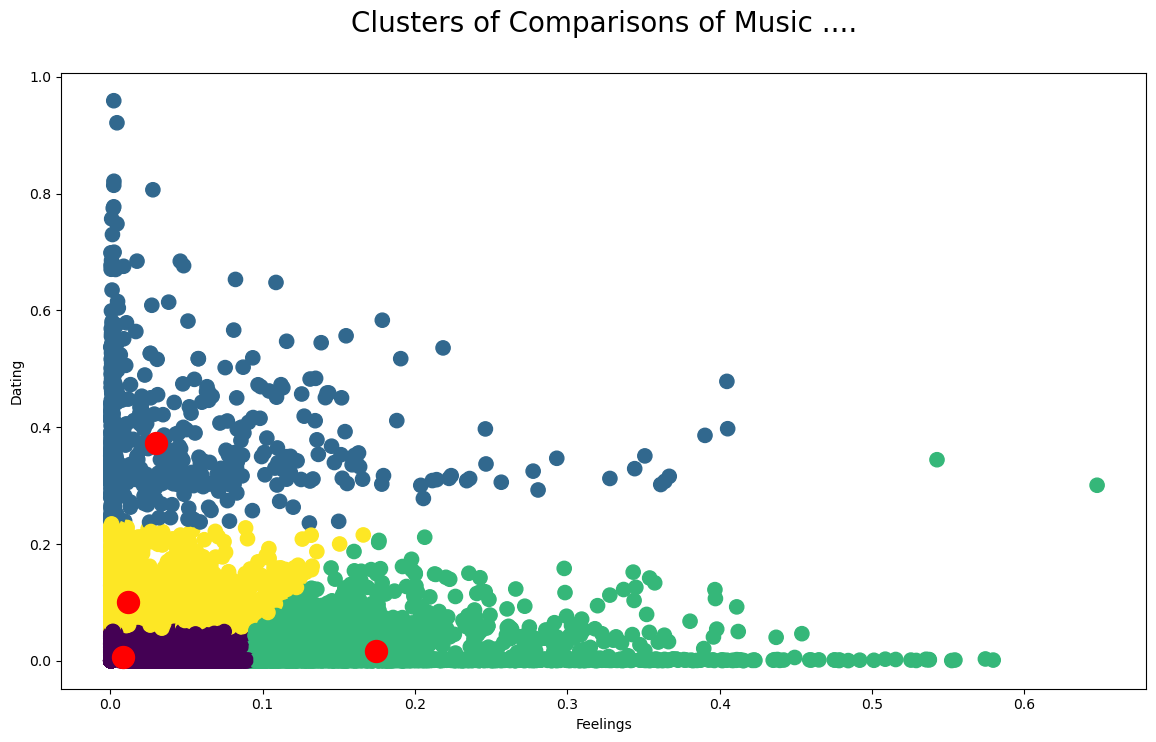

In [40]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Comparisons of Music ....\n', fontsize = 20)
plt.xlabel('Feelings')
plt.ylabel('Dating')
plt.show()